# Part 3

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Section آ

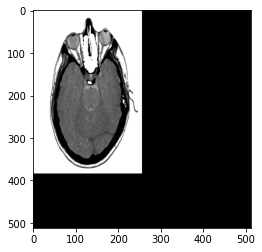

In [2]:
img = cv.imread('transformed.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.show()

<div style="text-align: right">تبدیلی که در تصویر اعمال شده است تبدیل تغییر مقیاس است زیرا که جهت تصویر و محورهای آن تغییری نکرده است</div>

In [3]:
last_pix = [0, 0]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 255:
            last_pix = [i, j]
print(f"Last pixel is ({last_pix[0]}, {last_pix[1]})")

Last pixel is (383, 255)


In [4]:
Cx, Cy = img.shape[0] / last_pix[0], img.shape[1] / last_pix[1]
Cx, Cy

(1.3368146214099217, 2.007843137254902)

In [5]:
print(Cx **-1, Cy**-1)

0.748046875 0.498046875


So Scaling Matrix was :
\begin{bmatrix}
0.748046875 & 0 & 0 \\
0 & 0.498046875 & 0 \\
0 & 0 & 1
\end{bmatrix}

In [6]:
def transformation(image, transform_mat, res):
    inv_transform_mat = np.linalg.inv(transform_mat)
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            pix = inv_transform_mat @ np.array([i, j, 1])
            pix = np.rint(pix).astype(int)
            x, y = pix[0], pix[1]
            if 0 <= x < image.shape[0] and 0 <= y < image.shape[1]:
                res[i, j] = image[x, y]
    return res

## Section ب

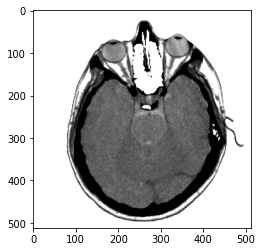

In [7]:
scaling_matrix = np.array(
    [[Cx, 0, 0],
    [0, Cy, 0],
    [0, 0, 1]])

res = np.zeros(img.shape, dtype=np.uint8)
res = transformation(img, scaling_matrix, res)
plt.imshow(res, cmap='gray', vmin = 0, vmax = 255)
plt.show()

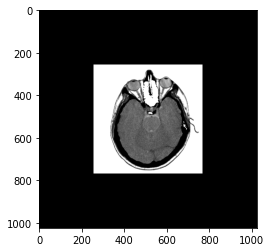

In [8]:
padded_image = np.pad(res, ((256, 256), (256, 256)), mode='constant', constant_values = (0, 0))
plt.imshow(padded_image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

## Section ج

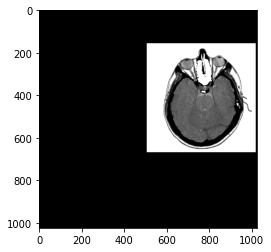

In [9]:
translation_matrix = np.array([
    [1, 0, -100],
    [0, 1, 250],
    [0, 0, 1]
])

translated = np.zeros(padded_image.shape, dtype=np.uint8)
translated = transformation(padded_image, translation_matrix, translated)
plt.imshow(translated, cmap='gray', vmin = 0, vmax = 255)
plt.show()

## Section د

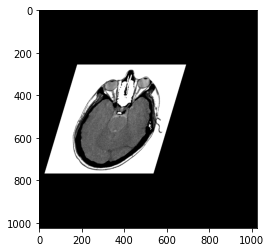

In [10]:
shear_matrix = np.array([
    [1, 0, 0],
    [-0.3, 1, 0],
    [0, 0, 1]
])

sheared = np.zeros(padded_image.shape, dtype=np.uint8)
sheared = transformation(padded_image, shear_matrix, sheared)
plt.imshow(sheared, cmap='gray', vmin = 0, vmax = 255)
plt.show()

## Section ه

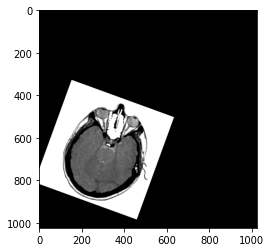

In [11]:
cost, sint = np.cos(np.deg2rad(-20)), np.sin(np.deg2rad(-20))

rotation_matrix = np.array([
    [cost, -sint, 0],
    [sint, cost, 0],
    [0, 0, 1]
])

rotated = np.zeros(padded_image.shape, dtype=np.uint8)
rotated = transformation(padded_image, rotation_matrix, rotated)
plt.imshow(rotated, cmap='gray', vmin = 0, vmax = 255)
plt.show()